IMPORTS

In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Activation,Dense # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.metrics import categorical_crossentropy # type: ignore
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  confusion_matrix,ConfusionMatrixDisplay
%matplotlib inline
import matplotlib.pyplot as plt

TRAINING DATA

In [2]:
train_lables=[]
train_sample=[]

for i in range(50):
    youn_rand = randint(13,65)
    train_sample.append(youn_rand)
    train_lables.append(1)
    
    old_rand = randint(65,100)
    train_sample.append(old_rand)
    train_lables.append(0)

for i in range(1000):
    youn_rand = randint(13,65)
    train_sample.append(youn_rand)
    train_lables.append(0)
    
    old_rand = randint(65,100)
    train_sample.append(old_rand)
    train_lables.append(1)
train_sample=np.array(train_sample)
train_lables=np.array(train_lables)
train_lables,train_sample = shuffle(train_lables,train_sample)
sclar = MinMaxScaler(feature_range=(0,1))
scaled_train_sample = sclar.fit_transform(train_sample.reshape(-1,1))

TEST DATA

In [3]:
test_lables=[]
test_sample=[]

for i in range(50):
    youn_rand = randint(13,65)
    test_sample.append(youn_rand)
    test_lables.append(1)
    
    old_rand = randint(65,100)
    test_sample.append(old_rand)
    test_lables.append(0)

for i in range(250):
    youn_rand = randint(13,65)
    test_sample.append(youn_rand)
    test_lables.append(0)
    
    old_rand = randint(65,100)
    test_sample.append(old_rand)
    test_lables.append(1)
test_sample=np.array(test_sample)
test_lables=np.array(test_lables)
test_lables,test_sample = shuffle(test_lables,test_sample)
scaled_test_sample = sclar.fit_transform(test_sample.reshape(-1,1))

MODEL NEURAL NETWORK

In [4]:
model = Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
])

c:\Users\RAVI PRAKASH\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(x=scaled_train_sample,y=train_lables,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 2s - 8ms/step - accuracy: 0.5011 - loss: 0.7043 - val_accuracy: 0.6286 - val_loss: 0.6905
Epoch 2/30
189/189 - 0s - 1ms/step - accuracy: 0.6429 - loss: 0.6781 - val_accuracy: 0.6667 - val_loss: 0.6653
Epoch 3/30
189/189 - 0s - 1ms/step - accuracy: 0.6804 - loss: 0.6534 - val_accuracy: 0.6810 - val_loss: 0.6416
Epoch 4/30
189/189 - 0s - 1ms/step - accuracy: 0.7090 - loss: 0.6290 - val_accuracy: 0.7286 - val_loss: 0.6181
Epoch 5/30
189/189 - 0s - 1ms/step - accuracy: 0.7487 - loss: 0.6029 - val_accuracy: 0.7333 - val_loss: 0.5907
Epoch 6/30
189/189 - 0s - 1ms/step - accuracy: 0.7677 - loss: 0.5752 - val_accuracy: 0.7476 - val_loss: 0.5636
Epoch 7/30
189/189 - 0s - 1ms/step - accuracy: 0.7931 - loss: 0.5467 - val_accuracy: 0.7667 - val_loss: 0.5344
Epoch 8/30
189/189 - 0s - 1ms/step - accuracy: 0.8212 - loss: 0.5146 - val_accuracy: 0.8190 - val_loss: 0.5001
Epoch 9/30
189/189 - 0s - 1ms/step - accuracy: 0.8481 - loss: 0.4832 - val_accuracy: 0.8333 - val_loss: 0.4716
E

PREDICTION

In [8]:
pre=model.predict(x=scaled_test_sample,batch_size=10,verbose=0)
round_pre=np.argmax(pre,axis=-1)

In [9]:
cm = confusion_matrix(y_true=test_lables,y_pred=round_pre)


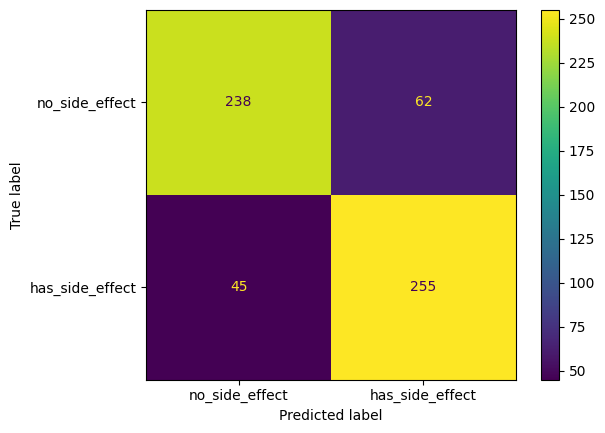

In [10]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no_side_effect', 'has_side_effect'])
cm_display.plot()
plt.show()


SAVE
TO SAVE AS JSON USE MODEl.to_json or to_yml but it will only save summary of model .
if you want to save weights use model.save_weight and use new_model.load_weights

In [11]:
import os.path
if os.path.isfile('models/medcial_trial_model.h5') is  False:
    model.save('models/medcial_trial_model.h5')